In [1]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

In [2]:
# get a list of models to evaluate
def get_models():
	models = dict()
  
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
  
	return models

In [3]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [7]:
# use the dataset
import pandas as pd
dataset= pd.read_csv('/Users/chensiyu/Desktop/dataset/boston_house_prices.csv')
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']  # continuous, regression task

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

>cart -2.975 (0.546)
>svm -5.318 (0.789)


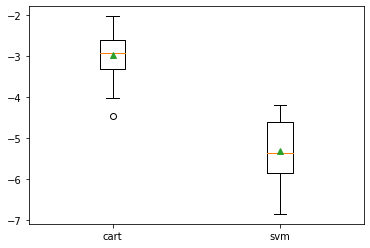

In [9]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [10]:
# apply stacking method on multiple regression models
from sklearn.ensemble import StackingRegressor

In [11]:
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']  # continuous, regression task

In [12]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	 
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

In [13]:
# get a list of models to evaluate
def get_models():
	models = dict()
 
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models
 

In [14]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>cart -2.921 (0.531)
>svm -5.318 (0.789)
>stacking -3.015 (0.497)


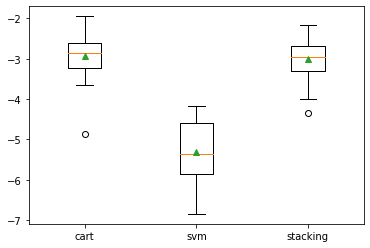

In [15]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [16]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y,mc):
  RMSE = [] ### Blank vector
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
    model_dt=DecisionTreeRegressor() # model
    m = model.fit(X_train,y_train) # fit the model
    y_pred = m.predict(X_test) # predict
    rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # compute rmse
    RMSE.append(rmse) # append rmse
    avg=np.mean(RMSE)   # average of rmse to stablize the result
  return avg

In [17]:
import numpy as np
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y,100)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>cart 4.647 (0.000)
>svm 8.280 (0.000)
>stacking 4.540 (0.000)
